![Banner](../../assets/banner-sprint3-desafio.png)

## INTRODUÇÃO

## BIBLIOTECAS

### Pandas

In [2]:
%pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Matplotlib

In [3]:
%pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [166]:
%pip install numpy
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## ANÁLISE EXPLORATÓRIA DOS DADOS

Importação do dataset em `googleplaystore.csv` para a variável `df` (*dataframe*). 

In [112]:
df = pd.read_csv("./googleplaystore.csv")

Análise do formato do dataset, com número de linhas e colunas:

In [4]:
df.shape

(10841, 13)

Análise inicial de uma amostra das 5 primeiras linhas do dataset.

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Análise dos tipos das colunas, a partir desta informação, verifica-se a necessidade de tratamento de dados para realização de cálculos. O tipo `object` é um tipo padrão do Pandas quando existem tipos variados em uma coluna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## ANÁLISE DESCRITIVA

### Tratamento de Dados

#### Remoção de Duplicações

Antes de iniciar a tratativa, primeiramente serão verificadas as duplicações existentes (caso ocorram); obtemos 483 linhas:

In [113]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


Para remover as duplicações, será utilizado o método `drop_duplicates()`. O qual remove duplicações em linhas, considerando o DataFrame inteiro ou somente colunas específicas, se utilizado o parâmetro `subset=['coluna']`.  

Será utilizado o parâmetro `inplace=True` para aplicar o método diretamente na variável `df`, caso contrário seria necessário atribuir o novo DataFrame sem duplicações a outra variável.  

Além disso, também existe a opção de selecionar qual linha será mantida; a 1ª ocorrência é a mantida por default, porém com o parâmetro `keep='last'` é possível manter a última, por exemplo. Aqui será mantida a configuração default.

In [57]:
df.drop_duplicates(inplace=True)

O DataFrame original continha 10841 linhas, destas sendo 483 duplicações, então, subtraindo os valores deve-se obter 10358 linhas:

In [58]:
df.shape

(10358, 13)

#### Conversão de Tipos

Os valores númericos serão convertidos para possibilitar a realização de análises calculáveis mais adiante. Antes disso, é necessário compreender a variabilidade de valores em cada coluna; o Pandas, por padrão, converte para o dtype `object` quando existem tipos "misturados" na coluna.  

Nos itens a seguir, os valores de cada coluna serão analisados para verificar qual o melhor tipo para conversão, e para isso será utilizado o método `unique()`. Logo após, será realizado o tratamento necessário da coluna e, por fim, a conversão.



In [3]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

##### Coluna: Reviews

Com a verificação abaixo, e considerando que se trata de uma contagem de número de reviews, será feita a transformação da coluna para o tipo `integer`.

In [114]:
print(f"Quantidade de valores distintos: {df['Reviews'].nunique()}.\n{'-'*100}\nAmostra de valores:\n\n{df['Reviews'].unique()}")


Quantidade de valores distintos: 6002.
----------------------------------------------------------------------------------------------------
Amostra de valores:

['159' '967' '87510' ... '603' '1195' '398307']


###### Tratamento da Linha 10472: Deslocamento de Valores à Esquerda

Aplicando uma conversão temporária para `string` com `.str`, utiliza-se o método `contains()` com padrões RegEx, para identificar valores na coluna que contenham o padrão indicado.  

Será verificado se existe algum valor na coluna `Reviews` que não seja numérico.

Descrição do RegEx:

- `[a-zA-Z]+` um ou mais caracteres alfabéticos, incluindo minúsculas e maiúsculas

In [115]:
df[df['Reviews'].str.contains(r'[a-zA-Z]+', regex=True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Somente um valor contém um caractere não-numérico `M`. Observando o restante dos dados da linha `10472`, nota-se o indício de um deslocamento à esquerda dos valores de todas as colunas.

Utilizando o método `loc`, será selecionado o número da linha `10472`, e as colunas serão salvas em uma lista para a manipulação dos dados. Como o valor da coluna `Category` ficará vazio, para contornar esse problema, será valorado como "Não Informado".  

Além disso, como a coluna `Rating` já possui o dtype `float64`, será preciso converter o valor em `valores[1]` dos valores, antes da realocação para a coluna `Rating`, para que não ocorra nenhum erro de incompatibilidade.

In [116]:
# Obtendo os valores atuais da linha 10472
valores = df.loc[10472].tolist()

# Convertendo valores[1] para float, visto que a coluna 'Ratings' já possui tipo float64
valores[1] = float(valores[1])

# Mantendo o valor inicial da coluna 'App', adicionando 'Não Informado' na coluna seguinte, e deslocando o restante dos valores para a direita
valores_realocados = [valores[0]] + ['Não Informado'] + valores[1:-1]

# Atualizando os valores no DataFrame com os valores realocados
df.loc[10472] = valores_realocados

Abaixo, uma confirmação de que a linha foi tratada adequadamente.

In [117]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                    Não Informado
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Agora sim, é possível realizar a alteração da coluna para o tipo `int` sem qualquer erro.

In [118]:
df['Reviews'] = df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


##### Coluna: Size

Com a verificação abaixo, nota-se que a coluna `Size` tem o padrão de um valor numérico seguido de `M` para "megabytes" ou `k` para "kilobytes".

In [75]:
print(f"Quantidade de valores distintos: {df['Size'].nunique()}.\n{'-'*100}\nAmostra de valores:\n\n{df['Size'].unique()}")

Quantidade de valores distintos: 462.
----------------------------------------------------------------------------------------------------
Amostra de valores:

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' 

Abaixo, confirmamos que não existe mais nenhum outro prefixo relacionado à grandeza de tamanho, como `g` ou `G` para "gigabytes".

In [76]:
df[df['Size'].str.contains(r'^[0-9]+\.?[0-9]*[^Mk]$', regex=True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Agora será necessário adotar uma só grandeza para a coluna: todos os valores serão mantidos em "megabytes", para isso será preciso selecionar somente os valores em "kilobytes" e convertê-los, dividindo por `1000` .

Existe um único caso com valor decimal, linha `1532`, que será monitorado para assegurar que foi convertido corretamente.

In [82]:
df[df['Size'].str.contains(r'^[0-9]+\.[0-9]*[^M]$', regex=True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8.5k,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up


Será utilizada uma ***boolean mask***, uma máscara booleana, que é um identificador de linhas que atendem a uma determinada condição, neste caso, correspondente ao RegEx `^[0-9]+\.?[0-9]*k$`:

- `^[0-9]+` iniciado com um ou mais caracteres numéricos
- `\.?` seguido ou não de ponto decimal
- `[0-9]*` seguido de zero ou mais caracteres numéricos
- `k$` finalizado com o caractere 'k'

O padrão acima seleciona tanto valores inteiros quanto valores com casas decimais, por exemplo, `20` ou `20.5` ou `20.56` são igualmente extraídos.  

In [120]:
# Localizando valores em kilobytes e salvando em uma variável boolean mask
kilobytes_mask = df['Size'].str.contains(r'^[0-9]+\.?[0-9]*k$', regex=True)

# Verificando que a linha monitorada foi capturada pela condição
kilobytes.iloc[1532] 

np.True_

A seguir, a ***boolean mask*** é aplicada na coluna `Size` para seleção e tratamento somente dos valores em "kilobytes".  

A função `extract()` utiliza um padrão RegEx para capturar a parte numérica. O parâmetro `expand` retorna:

- `True` o DataFrame completo
- `False` somente o Array com a coluna

Em seguida, o valor extraído é convertido para `float`; e, por fim, dividido por `1000` com o método `div()`, efetuando a conversão para "megabytes".  

Essas modificações são atualizadas na coluna `Size`.

In [121]:
# Convertendo os valores correspondentes em megabytes
df.loc[kilobytes_mask, 'Size'] = ( # Atualizando a coluna com as modificações a seguir
    df.loc[kilobytes_mask, 'Size']
    .str.extract(r'([0-9]+\.?[0-9]*)', expand=False)  # Extraindo parte numérica
    .astype(float)  # Convertendo para float
    .div(1000)  # Convertendo para megabytes
)

Verificando se a linha monitorada `1532` foi convertida de acordo:

In [102]:
df['Size'].iloc[1532]

0.0085

Para tratativa dos valores que possuem o caractere `M` para a quantidade de "megabytes", será utilizada a mesma lógica, com uma alteração no padrão RegEx para selecionar tais valores:

- `^[0-9]+` iniciado com um ou mais caracteres numéricos
- `\.?` seguido ou não de ponto decimal
- `[0-9]*` seguido de zero ou mais caracteres numéricos
- `M$` finalizado com o caractere 'M'

In [122]:
# Localizando valores em megabytes e salvando em uma variável boolean mask
megabytes_mask = df['Size'].str.contains(r'^[0-9]+\.?[0-9]*M$', regex=True, na=False)

df.loc[megabytes_mask, 'Size'] = ( # Atualizando a coluna com as modificações a seguir
    df.loc[megabytes_mask, 'Size']
    .str.extract(r'([0-9]+\.?[0-9]*)', expand=False)  # Extraindo parte numérica
    .astype(float)  # Convertendo para float
)

Finalizado o tratamento dos valores numéricos no padrão de "kilobytes" e "megabytes", agora serão verificados casos não-numéricos.

O padrão RegEx abaixo seleciona linhas que não possuem nenhum dígito; nota-se que temos `1695` valores, aparentemente todos sendo `Varies with device`, ou seja, que variam de acordo com o dispositivo.  

Descrição do RegEx:

- `^` indica o início do valor *(convertido temporariamente para string)*
- `[^0-9]` o `^` dentro dos colchetes indica negação, portanto, exclui caracteres que sejam numéricos
- `.*` seleciona quaisquer caracteres que não foram anteriormente negados, ou seja, caracteres não-numéricos
- `$` indica o fim do valor

*OBS: como o padrão está entre `^$`, está sendo buscado um match total.*

In [123]:
df[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


Utilizando o mesmo padrão anterior, confirmamos com `unique()` que `Varies with device` é o único valor não numérico.

In [124]:
df[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False)]['Size'].unique()

array(['Varies with device'], dtype=object)

Antes de realizar a conversão da coluna `Size` para `float`, será adotado o valor `-1` para esses dados, visto que é um valor "irreal" para um tamanho de aplicativo, portanto será tratado com essa semântica específica. 

Lembrando que, durante a realização de análises estatísticas, será preciso considerar e filtrar esses valores para que não ocorram distorções indesejadas na análise.

In [127]:
df.loc[df['Size'].str.contains(r'^[^0-9].*$', regex=True, na=False), 'Size'] = -1

Agora, que a coluna só contém dados numéricos, será convertida para `float`.

In [128]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839      -1
10840    19.0
Name: Size, Length: 10841, dtype: object

In [129]:
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


##### Coluna: Installs

Com a verificação abaixo, nota-se o padrão para a coluna `Installs`: valor numérico, com milhares separados por vírgula, seguidos de `+`. Indicando que a quantidade de instalações excede tal valor. Ex: `10,000+` significa "mais de 10000 instalações". 

Para esta coluna, será considerado somente o valor numérico e, para não perder a informação transmitida com `+`, a coluna será renomeada posteriormente para refletir essa semântica.

Será preciso decidir o que fazer com o valor `Free`, o qual seria mais adequado na coluna `Type`. Este caso será tratado separadamente.

In [130]:
print(f"Quantidade de valores distintos: {df['Installs'].nunique()}.\n{'-'*100}\nAmostra de valores:\n\n{df['Installs'].unique()}")

Quantidade de valores distintos: 21.
----------------------------------------------------------------------------------------------------
Amostra de valores:

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


Abaixo, com o método `replace()` as vírgulas são removidas (na realidade, substituídas por "nada") e, em seguida, os valores numéricos são extraídos com `extract()`, desprezando o `+`, e a coluna `Installs` atualizada com o resultado.

In [132]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'].unique()

array(['10000+', '500000+', '5000000+', '50000000+', '100000+', '50000+',
       '1000000+', '10000000+', '5000+', '100000000+', '1000000000+',
       '1000+', '500000000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '0+', '0'], dtype=object)

In [133]:
df['Installs'] = df['Installs'].str.extract(r'([0-9]+\.?[0-9]*)', expand=False)
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Após a tratativa, mantidos somente os caracteres numéricos, é possível realizar a conversão da coluna para `int`.

In [134]:
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


##### Coluna: Price

Visto que temos muitos valores `0` na coluna `Price`, abaixo é feita uma seleção de amostra de valores diferentes de `0`.  
Assumindo que a coluna adota o padrão `$` seguido de valor decimal, será feita a extração do valor numérico e conversão para `float`.

In [135]:
print(f"Quantidade de valores distintos: {df['Price'].nunique()}.\n{'-'*100}\nAmostra de valores:\n\n{df[df['Price'] != '0']['Price'].unique()}")

Quantidade de valores distintos: 92.
----------------------------------------------------------------------------------------------------
Amostra:

['$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49' '$10.99'
 '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95' '$4.49'
 '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99' '$400.00'
 '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29'
 '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99' '$19.90'
 '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99' '$3.08'
 '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$4.29'
 '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97' '$200.00'
 '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20' '$1.04']


### 4.2 Top 5 Apps: Número de Instalações

In [152]:
df[df['Installs'] == 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,-1.0,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,-1.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,-1.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,-1.0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,-1.0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,-1.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433,-1.0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,-1.0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


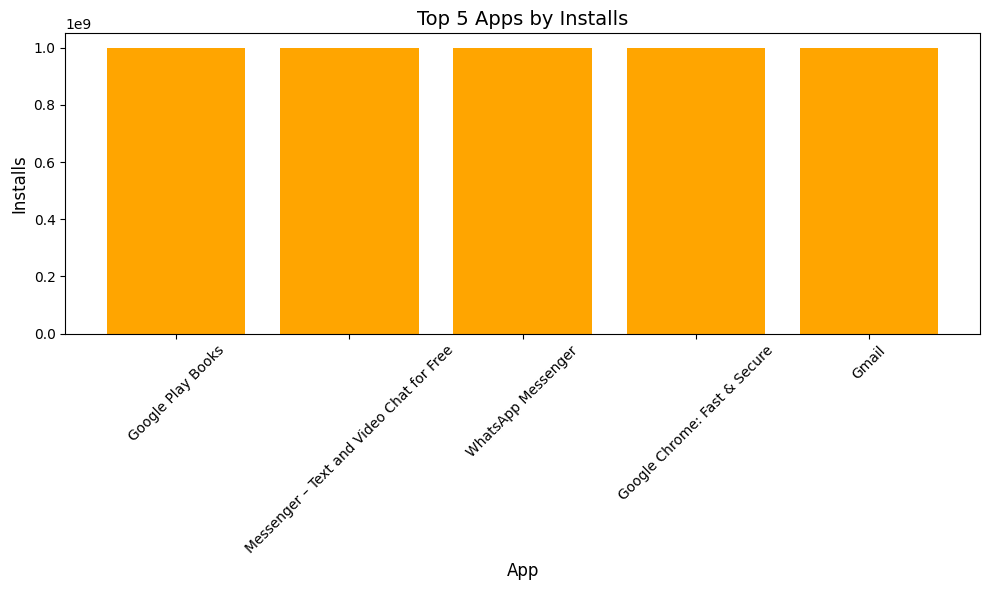

In [139]:
# Gráfico de barras
# Find top 5 values
top_5 = df.nlargest(5, 'Installs')

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5['App'], top_5['Installs'], color='orange')
plt.xlabel('App', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.title('Top 5 Apps by Installs', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3 Frequência de Categorias de Apps

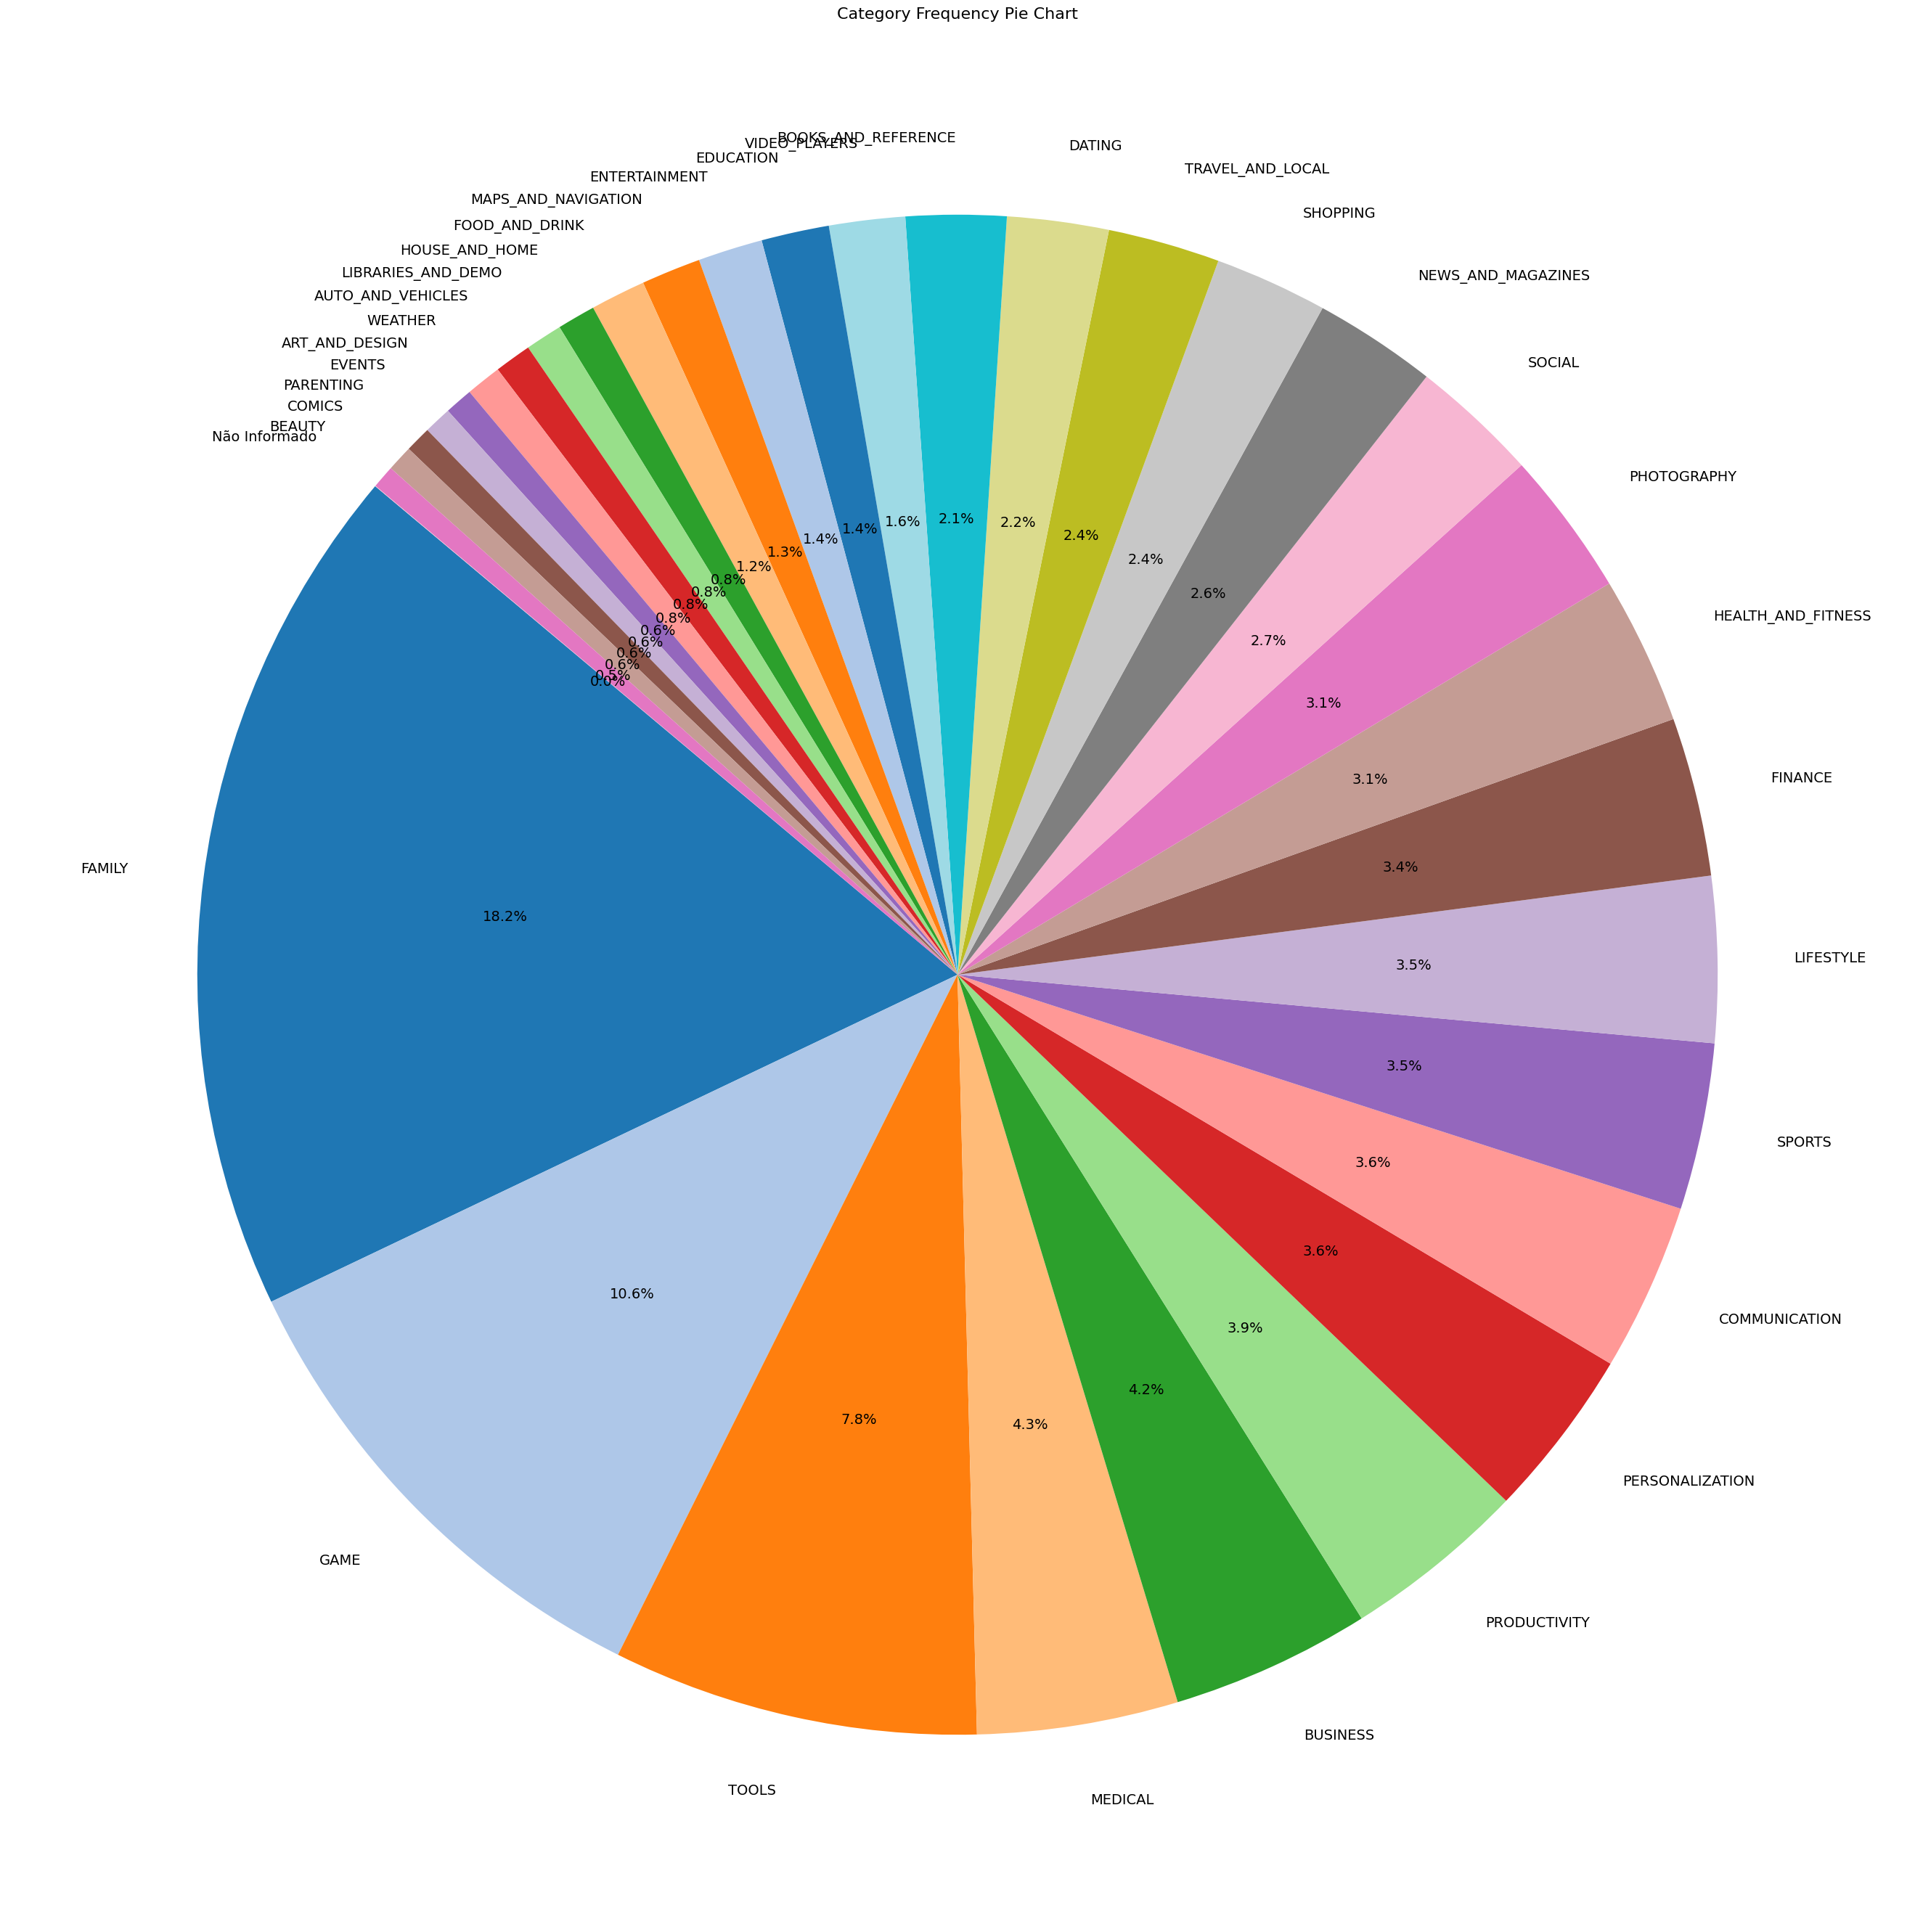

In [177]:
# Gráfico Pie Chart
# Calculate frequencies
category_counts = df['Category'].value_counts()

# Plot a pie chart with larger labels
plt.figure(figsize=(34, 34))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,
    textprops={'fontsize': 14}  # Increase label font size
)
plt.title('Category Frequency Pie Chart', fontsize=16)
plt.show()

### 4.4 App Mais Caro

### 4.5 Quantidade de Apps para Maiores

In [180]:
df[df['Content Rating'] == 'Mature 17+']['Content Rating'].value_counts()

Content Rating
Mature 17+    499
Name: count, dtype: int64

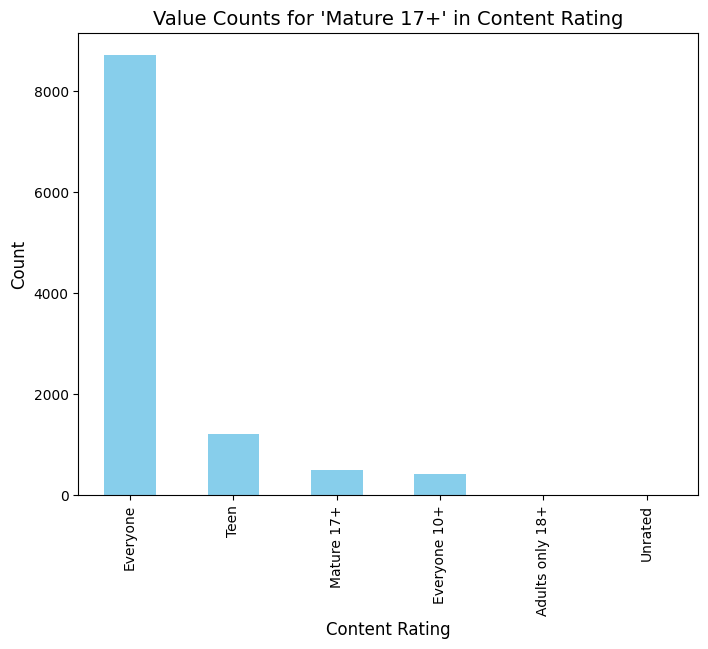

In [181]:
# Quantos apps são classificados como 'Mature 17+'


# Filter rows where 'Content Rating' is 'Mature 17+'
content_rating = df['Content Rating']

# Get the value counts for 'Mature 17+' entries (if you need counts of other columns as well)
value_counts = content_rating.value_counts()

# Plot the result
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title("Value Counts for 'Mature 17+' in Content Rating", fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

### 4.6 Top 10 Apps: Número de Reviews

In [9]:
# Ordenar decrescentemente por nº de reviews

### 4.7 Cálculos Adicionais

#### 4.7.1 Top X Apps:

In [10]:
# Cálculo em forma de lista

#### 4.7.2 App Mais X

In [11]:
# Cálculo com valor único (ex. app mais caro)